# HWK4 Part 1

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from random import randint
import utils

### a) Download the CIFAR dataset (train and test set) and figure out what are the various sizes (number of images, number of channels and number of pixels).

In [2]:
train_data = torch.load("../../data/cifar/train_data.pt")
train_label = torch.load("../../data/cifar/train_label.pt")
test_data = torch.load("../../data/cifar/test_data.pt")
test_label = torch.load("../../data/cifar/test_data.pt")

### b) Make a three-layer net with a softmax at the end:
$$ \text{Linear1} \rightarrow \text{ReLU} \rightarrow  \text{Linear2} \rightarrow \text{ReLU} \rightarrow 
\text{Linear3} \rightarrow 
\text{Softmax}   $$
### Each of the hidden layers should have size = 50.
### Carefully pick the dimension for the Softmax so that your network can process batches.

In [3]:
class three_layer_net(nn.Module):

    def __init__(self, input_size, hidden_size1, hidden_size2,  output_size):
        super().__init__()

        self.L1 = nn.Linear(input_size, hidden_size1, bias=False)
        self.L2 = nn.Linear(hidden_size1, hidden_size2, bias=False)
        self.L3 = nn.Linear(hidden_size2, output_size, bias=False)
        
        
    def forward(self, x):
        
        x = self.L1(x)
        x = F.relu(x)
        x = self.L2(x)
        x = F.relu(x)
        x = self.L3(x)
        p = F.softmax(x, dim=1)
        
        return p
    
    
net = three_layer_net(32*32*3,50,50,10)
print(net)

three_layer_net(
  (L1): Linear(in_features=3072, out_features=50, bias=False)
  (L2): Linear(in_features=50, out_features=50, bias=False)
  (L3): Linear(in_features=50, out_features=10, bias=False)
)


### c) Take a random image from the test set (using the randint() python function), and display it using the utils.show() function.

### Then feed this image to the net (remeber that it needs to be considered as a batch of one image -- from now on we ONLY PROCESS BATCH OF IMAGES).

### Then display the confidence scores given by our untrained network using the utils.show_prob_cifar() functions.

torch.Size([50000, 3, 32, 32])


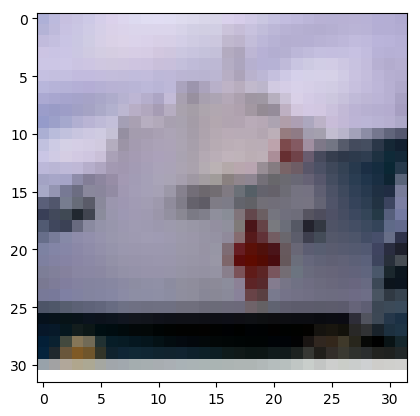

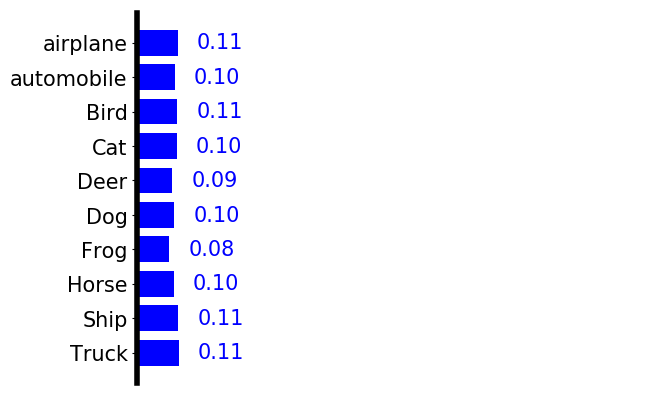

In [6]:
idx = randint(0, 10000)
im = test_data[idx]
utils.show(im)
p = net(im.view(1,32*32*3))
utils.show_prob_cifar(p)

### d) Train the network. Use batch size = 200 and do 10,000 iterations (it will take a minute or so).

In [11]:
bs = 200

# ignore this:
criterion = nn.NLLLoss()
optimizer=torch.optim.SGD(net.parameters() , lr=0.01 )

for iter in range(10000):
    
    indices = torch.LongTensor(bs).random_(0,50000) 
    minibatch_data = train_data[indices]
    minibatch_label = train_label[indices]
    
    # reshape the minibatch to fit the network
    inputs = minibatch_data.view(bs, 32*32*3)
    
    # feed the input to the net  
    prob = net(inputs)
    
    
    # update the weights (all the magic happens here -- we will discuss it later)
    log_prob=torch.log(prob)
    loss = criterion(log_prob, minibatch_label)    
    optimizer.zero_grad()       
    loss.backward()
    optimizer.step()
    

### e) Take a random image from the test set, display it, feed it to the net, and display the confidence scores (as in part c)). How is the network doing? Not great?

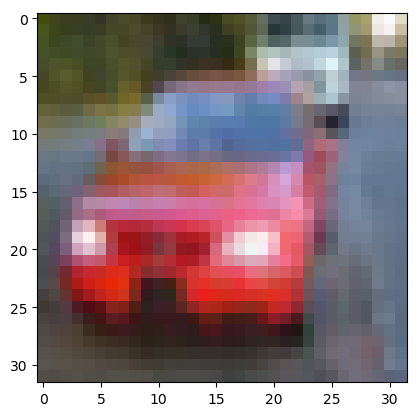

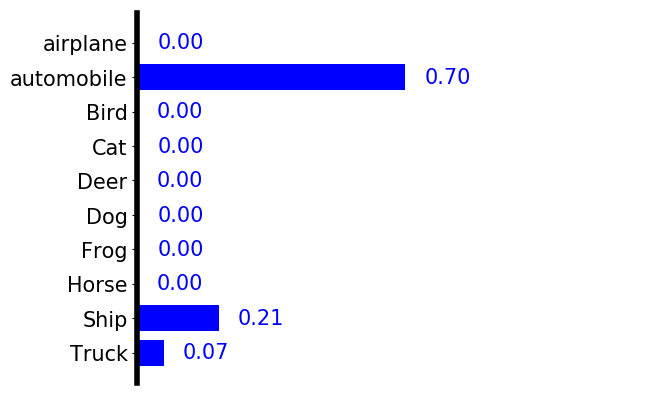

In [80]:
idx = randint(0, 10000)
im = test_data[idx]
utils.show(im)
p = net(im.view(1,32*32*3))
utils.show_prob_cifar(p)

### f) There are a few categories on which the network does quite well, which ones? Complete the markdown cell below. Does it make sense?

The network is good at recognizing planes, automobile. It makes sense that it confuses animals together, like deer with dog.